In [1]:
import numpy as np
import pandas as pd

### Univariate Detection

In [3]:
sal = []
for x in range(100):
    num = np.random.randint(20000,35000)
    sal.append(num)

In [5]:
df = pd.DataFrame({'salary':sal})

In [7]:
df.at[45,'salary'] = 54000
df.at[81,'salary'] = 49000

In [8]:
df

,salary
0,31791
1,28402
2,29014
3,34973
4,27792
...,...
95,31449
96,29682
97,28812
98,34998


#### Boxplot

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

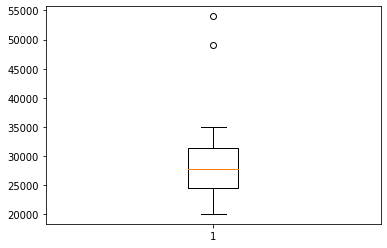

In [12]:
plt.boxplot(df['salary']);

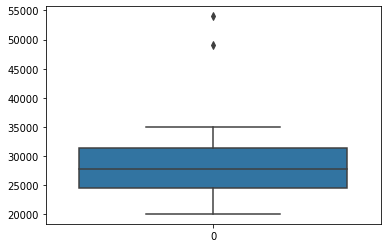

In [14]:
sns.boxplot(data=df['salary']);

<AxesSubplot:>

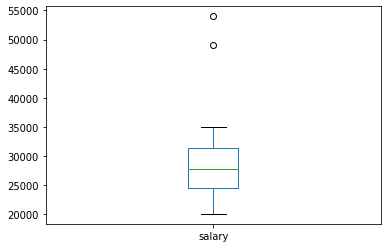

In [15]:
df.plot.box()

#### Histogram

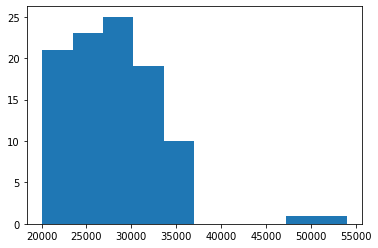

In [18]:
plt.hist(df['salary']);

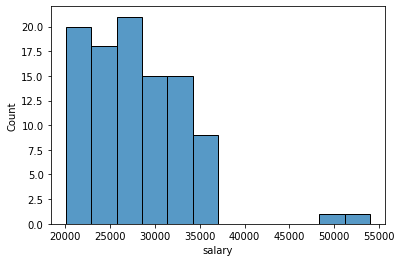

In [20]:
sns.histplot(df['salary']);

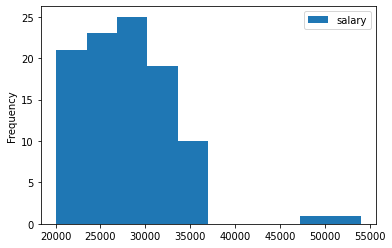

In [22]:
df.plot.hist();

In [23]:
# Filter the outliers
new_df = df[df['salary'] < 40000]

In [24]:
new_df.shape

(98, 1)

### Multivariate Outliers Detection

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.shape

(400, 5)

In [30]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [31]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [34]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(random_state=0, contamination=0.05)
clean = isf.fit_predict(x, y)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [37]:
x_clean = x[clean==1]
y_clean = y[clean==1]

In [38]:
x_clean.shape

(380, 2)

In [39]:
y_clean.shape

(380,)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_clean, y_clean, random_state=0, stratify=y_clean)

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8736842105263158